In [1]:
# 🎯 IMPLEMENTAR: Análisis completo del dataset

# === Sección 1: Estadísticas Básicas ===
# TODO:
# - Imprimir número de usuarios, items, interacciones
# - Calcular longitud promedio/min/max de secuencias
# - Calcular distribución de ratings

# === Sección 2: Visualizaciones ===
# TODO: Crear al menos 3 gráficos:

# 1. Histograma de longitud de secuencias
import matplotlib.pyplot as plt
# plt.hist(...) 

# 2. Distribución de ratings (barplot)
# plt.bar(...)

# 3. Top-20 películas más populares
# Contar frecuencia de cada item, ordenar, graficar

# BONUS: Distribución de ratings por grupo

In [33]:
from src.data.load_data import load_training_data
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import seaborn as sns

# Análisis y exploración del dataset

## Sección 1: estadísticas básicas

In [7]:
df_train = load_training_data()
df_train

,user_id,user_group,items,ratings
0,0,0,"[472, 97, 122, 654, 709, 467, 574, 544, 478, 3...","[4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 2.0, 1.0, 4.0, ..."
1,1,0,"[431, 445, 367, 100, 743, 739, 263, 426, 321, ...","[3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 1.0, 4.0, 5.0, ..."
2,2,0,"[224, 133, 227, 51, 230, 546, 57, 60, 743, 495...","[5.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 5.0, 5.0, ..."
3,3,0,"[338, 80, 210, 618, 468, 320, 351, 411, 575, 2...","[3.0, 5.0, 3.0, 5.0, 2.0, 1.0, 4.0, 3.0, 3.0, ..."
4,4,0,"[510, 231, 708, 86, 514, 352, 233, 351, 415, 6...","[4.0, 2.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, ..."
...,...,...,...,...
15995,15995,7,"[503, 434, 631, 301, 142, 355, 80, 191, 310, 3...","[1.0, 1.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 4.0, ..."
15996,15996,7,"[263, 76, 247, 324, 733, 57, 658, 25, 680, 282...","[2.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 1.0, ..."
15997,15997,7,"[517, 212, 79, 151, 644, 612, 324, 322, 248, 6...","[2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, ..."
15998,15998,7,"[602, 534, 312, 16, 590, 330, 100, 364, 353, 2...","[1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 4.0, 4.0, 2.0, ..."


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     16000 non-null  int64 
 1   user_group  16000 non-null  int64 
 2   items       16000 non-null  object
 3   ratings     16000 non-null  object
dtypes: int64(2), object(2)
memory usage: 500.1+ KB


In [19]:
# Número de usuarios únicos
n_users = df_train['user_id'].nunique()
# Número de items distintos presentes en las secuencias
all_items = set(itertools.chain.from_iterable(df_train['items']))
n_items = len(all_items)
# Número total de interacciones (suma de longitudes de secuencia)
n_interactions = df_train['items'].apply(len).sum()
print(f'Número de usuarios: {n_users}')
print(f'Número de items (distintos en el dataset): {n_items}')
print(f'Número de interacciones (total): {n_interactions}')

Número de usuarios: 16000
Número de items (distintos en el dataset): 752
Número de interacciones (total): 1797612


In [18]:
sequence_lengths = df_train['items'].apply(len)

print(f"\n--- Estadísticas de Secuencias ---")
print(f"Longitud Promedio: {sequence_lengths.mean():.2f}")
print(f"Longitud Mínima:   {sequence_lengths.min()}")
print(f"Longitud Máxima:   {sequence_lengths.max()}")


--- Estadísticas de Secuencias ---
Longitud Promedio: 112.35
Longitud Mínima:   25
Longitud Máxima:   200


In [14]:
ratings_exploded = df_train['ratings'].explode()

# Calculamos el conteo de cada valor
rating_counts = ratings_exploded.value_counts().sort_index()

print(f"\n--- Distribución de Ratings (Conteo) ---")
print(rating_counts)

print(f"\n--- Distribución de Ratings (Porcentaje) ---")
print(ratings_exploded.value_counts(normalize=True).sort_index() * 100)


--- Distribución de Ratings (Conteo) ---
ratings
1.0    249659
2.0    322585
3.0    398913
4.0    442577
5.0    383878
Name: count, dtype: int64

--- Distribución de Ratings (Porcentaje) ---
ratings
1.0    13.888370
2.0    17.945196
3.0    22.191274
4.0    24.620274
5.0    21.354886
Name: proportion, dtype: float64


## Sección 2: visualizaciones

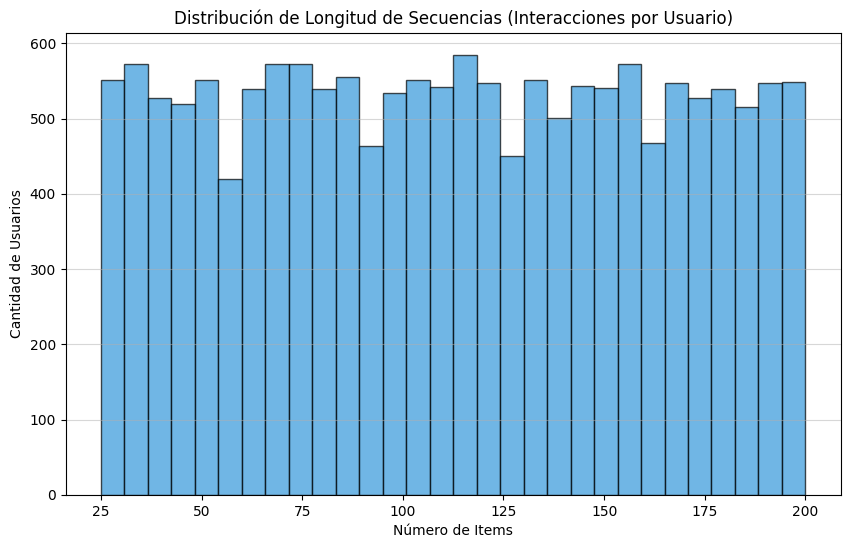

In [28]:
# ---------------------------------------------------------
# 1. HISTOGRAMA DE LONGITUD DE SECUENCIAS
# ---------------------------------------------------------
# Calculamos cuántos items tiene cada usuario
seq_lengths = df_train['items'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(seq_lengths, bins=30, color='#3498db', edgecolor='black', alpha=0.7)
plt.title('Distribución de Longitud de Secuencias (Interacciones por Usuario)')
plt.xlabel('Número de Items')
plt.ylabel('Cantidad de Usuarios')
plt.grid(axis='y', alpha=0.5)
plt.show()

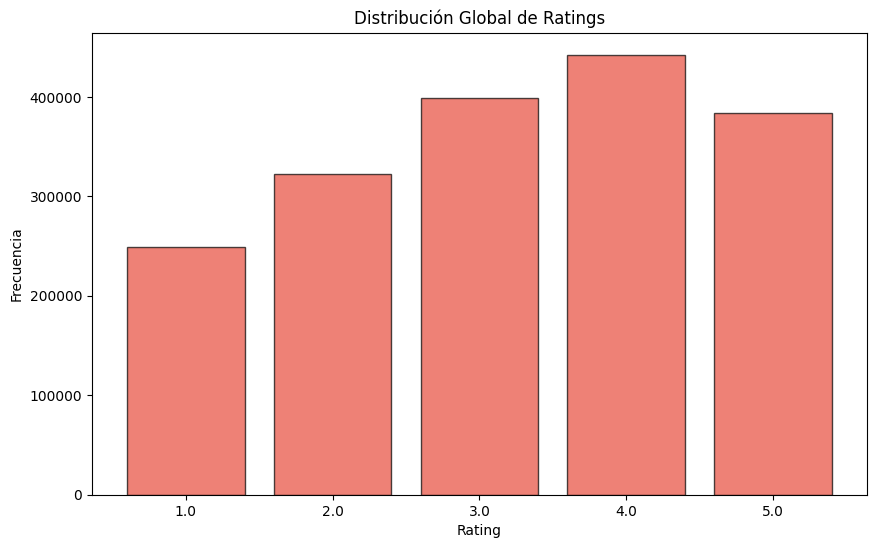

In [29]:
# ---------------------------------------------------------
# 2. DISTRIBUCIÓN DE RATINGS (BARPLOT)
# ---------------------------------------------------------
# Aplanamos la lista de ratings para contar cada voto individual
# (Usamos una lista por comprensión por eficiencia)
all_ratings = [r for sublist in df_train['ratings'] for r in sublist]
rating_counts = pd.Series(all_ratings).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index.astype(str), rating_counts.values, color='#e74c3c', edgecolor='black', alpha=0.7)
plt.title('Distribución Global de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

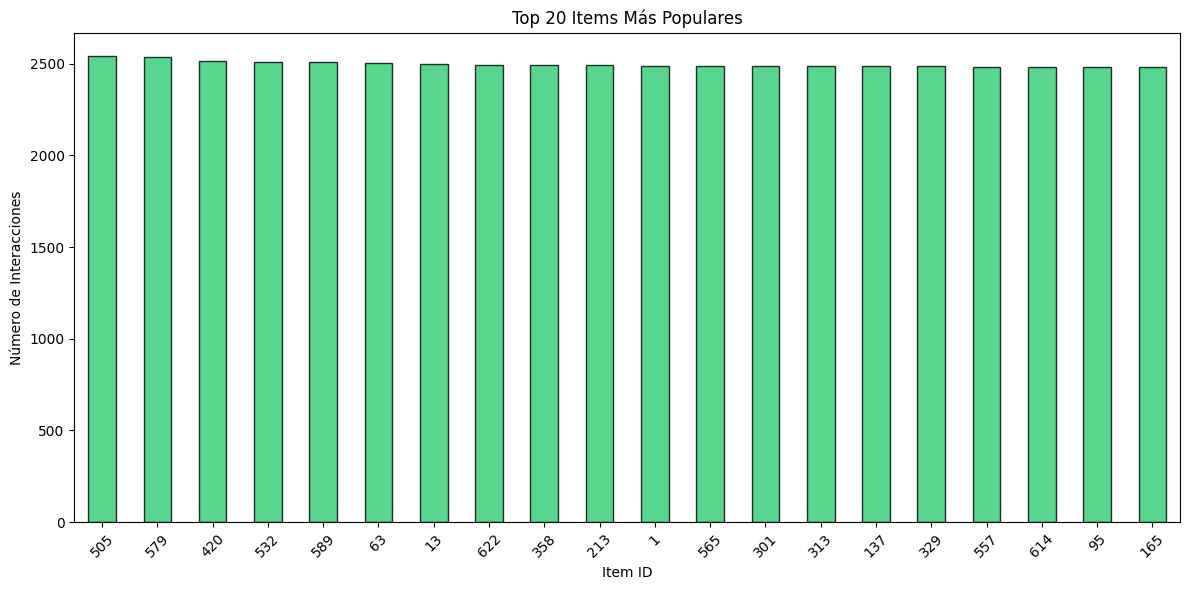

In [30]:
# ---------------------------------------------------------
# 3. TOP-20 PELÍCULAS MÁS POPULARES
# ---------------------------------------------------------
# Aplanamos la lista de items
all_items = [item for sublist in df_train['items'] for item in sublist]

# Contamos frecuencia y tomamos los 20 primeros
top_items = pd.Series(all_items).value_counts().head(20)

plt.figure(figsize=(12, 6))
top_items.plot(kind='bar', color='#2ecc71', edgecolor='black', alpha=0.8)
plt.title('Top 20 Items Más Populares')
plt.xlabel('Item ID')
plt.ylabel('Número de Interacciones')
plt.xticks(rotation=45)
plt.tight_layout() # Ajusta para que no se corten las etiquetas
plt.show()

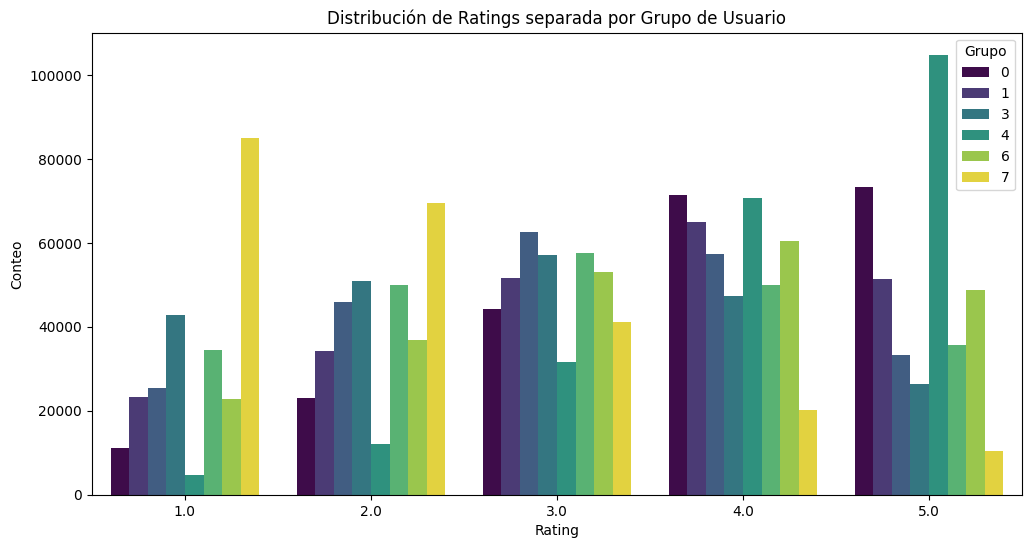

In [35]:
# ---------------------------------------------------------
# BONUS: DISTRIBUCIÓN DE RATINGS POR GRUPO
# ---------------------------------------------------------

df_exploded = df_train[['user_group', 'ratings']].explode('ratings')

plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, x='ratings', hue='user_group', palette='viridis')
plt.title('Distribución de Ratings separada por Grupo de Usuario')
plt.xlabel('Rating')
plt.ylabel('Conteo')
plt.legend(title='Grupo', loc='upper right')
plt.show()